## Inference Notebook
### Libraries

In [1]:
import torch
import sys
import pandas as pd
# import torchvision
import numpy as np
import pandas as pd
%matplotlib inline
import skimage.io as io
import matplotlib.pyplot as plt
import csv
import random
import torch.nn as nn
from nltk.translate.bleu_score import corpus_bleu
from tqdm.auto import tqdm
from loader import FlickrDataset,preprocessing_transforms,get_data_loader,denormalize,Padding
from vocab import Vocabulary
from inference import beam_search
from csv import DictWriter
from model import EncoderCNN,DecoderRNN
from model_utils import train, validate,clip_gradient,save_checkpoint,evaluate_test
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pack_padded_sequence
import time
import math
import sys
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# del sys.modules['inference']

In [3]:
vocab = Vocabulary(vocab_file = './vocab10000.txt',vocab_size = 10000)
vocab.load_vocab()

In [4]:
test = pd.read_csv('./flickr30k_processed/test.csv')

### Inference on Model I and II

In [5]:
checkpoint_1 = torch.load('./image_captioning_best.pth',map_location=device)
encoder_1 = checkpoint_1['encoder'].to(device)
decoder_1 = checkpoint_1['decoder'].to(device)
alpha_c = 1

In [6]:
checkpoint_2 = torch.load('./image_captioning_best_2.pth',map_location=device)
encoder_2 = checkpoint_2['encoder'].to(device)
decoder_2 = checkpoint_2['decoder'].to(device)

In [8]:
checkpoint_4 = torch.load('./image_captioning_best_4.pth',map_location=device)
encoder_4 = checkpoint_4['encoder'].to(device)
decoder_4 = checkpoint_4['decoder'].to(device)

In [9]:
image_list = test['image'].unique().tolist()

In [16]:

random.seed(1234)

In [22]:
def show_inference(image_list):

    image = random.choice(image_list)
    print(f"Inferece for image {image.split('/')[-1]} :")
    print('Model I')
    print(beam_search(encoder_1,decoder_1,image_path=f'./flickr30k_processed/{image}',vocab = vocab,vocab_size=10000,device=device,print_image=False))
    print('Model II')
    print(beam_search(encoder_2,decoder_2,image_path=f'./flickr30k_processed/{image}',vocab = vocab,vocab_size=10000,device=device))
    print('Model IV')
    print(beam_search(encoder_4,decoder_4,image_path=f'./flickr30k_processed/{image}',vocab = vocab,vocab_size=10000,device=device))


Inferece for image 1043910339.jpg :
Model I
a young boy in a red jersey is kicking a soccer ball
Model II
a baseball player in a red uniform is throwing a ball
Model IV
a young man wearing a red shirt and black shorts is playing tennis


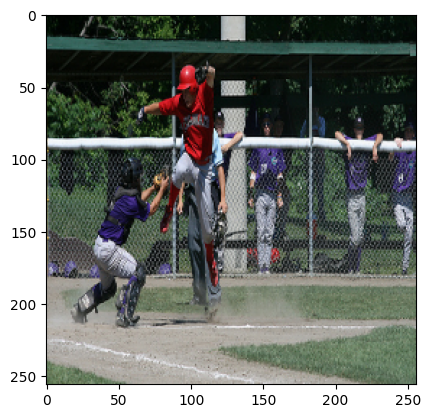

In [23]:
show_inference(image_list)

Inferece for image 1809758121.jpg :
Model I
a young man in a blue shirt and black pants is jumping into the water
Model II
a man in a blue shirt and blue jeans is jumping into the water
Model IV
a young girl jumping in the water


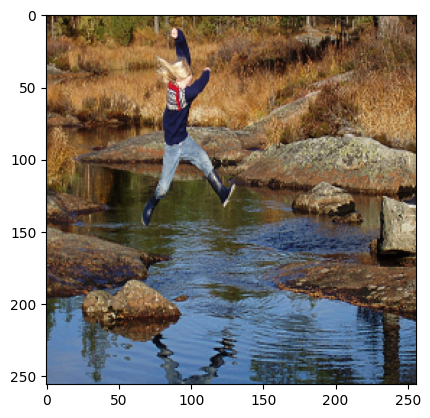

In [24]:
show_inference(image_list)

Inferece for image 697490420.jpg :
Model I
a woman in a blue dress is walking on the sidewalk
Model II
a man in a tank top is on a yellow boat
Model IV
a woman in a black and white dress is walking down the street


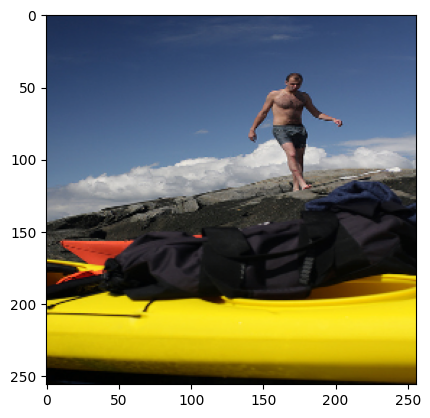

In [25]:
show_inference(image_list)

Inferece for image 7567712136.jpg :
Model I
a man and a woman are standing next to a fire
Model II
a man and a woman are walking through a tunnel
Model IV
a man is standing in a dimly lit room


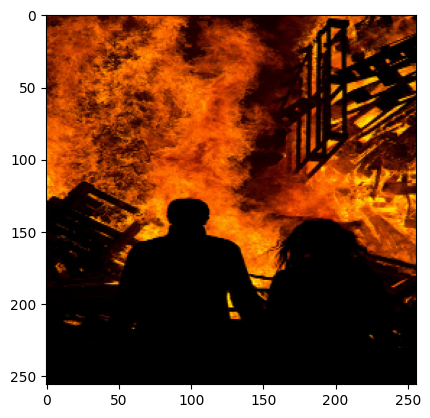

In [26]:
show_inference(image_list)

Inferece for image 7468663062.jpg :
Model I
a woman in a blue shirt is playing tennis
Model II
a woman in a blue shirt is playing tennis
Model IV
a woman in a blue shirt is playing tennis


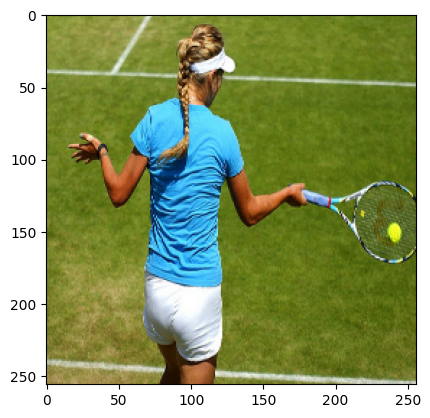

In [27]:
show_inference(image_list)

Inferece for image 509123893.jpg :
Model I
a young girl is sitting on the ground with a small child
Model II
a little girl in a pink shirt is sitting on the ground
Model IV
a young girl in a white shirt is sitting on the ground with her hands


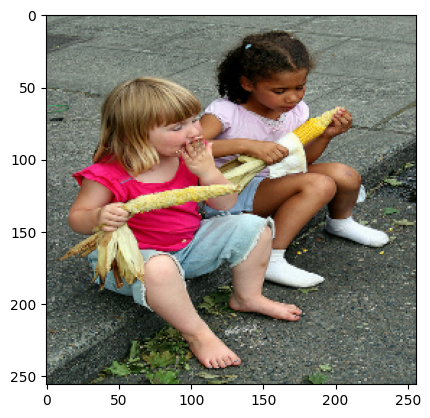

In [28]:
show_inference(image_list)

Inferece for image 4282819676.jpg :
Model I
children playing in a park
Model II
a boy in a blue shirt is playing on a playground
Model IV
a group of children playing on a playground


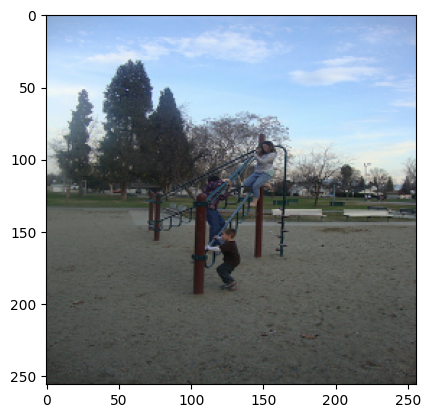

In [29]:
show_inference(image_list)

Inferece for image 1287704027.jpg :
Model I
a man and a woman are looking at a display of food
Model II
a man in a striped shirt is looking at a man in a blue shirt
Model IV
a man in a white shirt and blue pants is standing behind a food cart


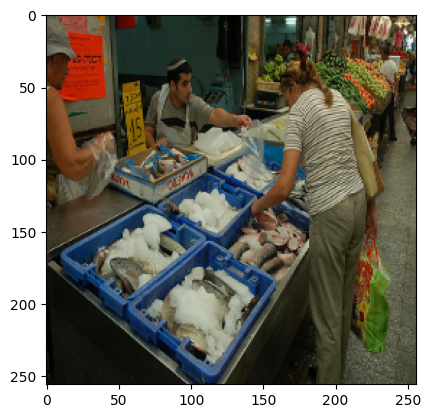

In [30]:
show_inference(image_list)

Inferece for image 4665413015.jpg :
Model I
a group of people walking down a city street
Model II
a man in an orange robe is walking down the street
Model IV
a woman in a yellow jacket is walking down the street


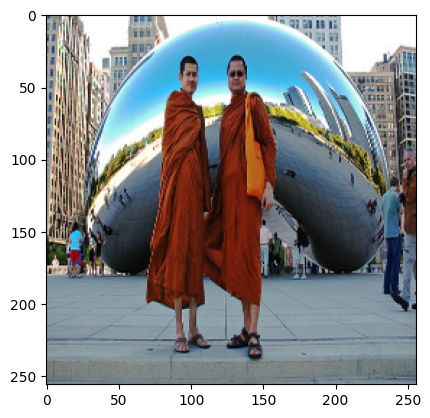

In [31]:
show_inference(image_list)

Inferece for image 4731694958.jpg :
Model I
a group of people are riding bikes on a bridge
Model II
a man and a woman are riding bikes on a sunny day
Model IV
a group of people are riding bikes on a bridge


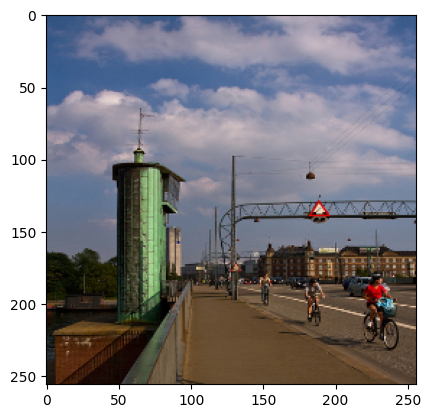

In [32]:
show_inference(image_list)

Inferece for image 172092464.jpg :
Model I
a young man in a blue shirt and blue shorts is standing in the water
Model II
a man in a blue shirt and blue shorts is waterskiing
Model IV
a young boy in a blue shirt and blue shorts is holding a rope


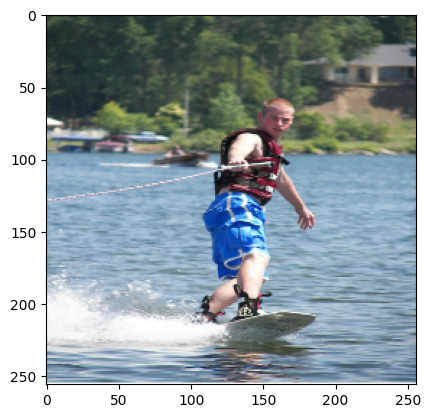

In [33]:
show_inference(image_list)

Inferece for image 1957683077.jpg :
Model I
a man and a woman are in a kitchen
Model II
a woman in a black shirt is standing in front of a counter
Model IV
a group of people sitting at a table


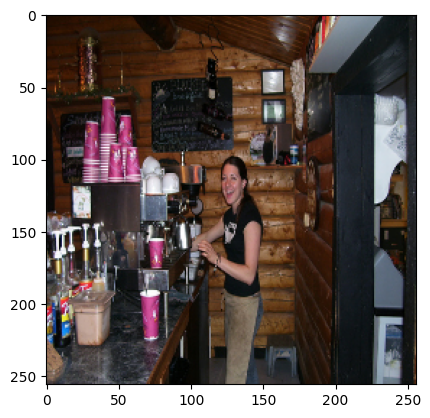

In [34]:
show_inference(image_list)

Inferece for image 4871230195.jpg :
Model I
a group of people sitting at a table
Model II
a group of people sit at a table in front of a tent
Model IV
a group of people sitting outside of a restaurant


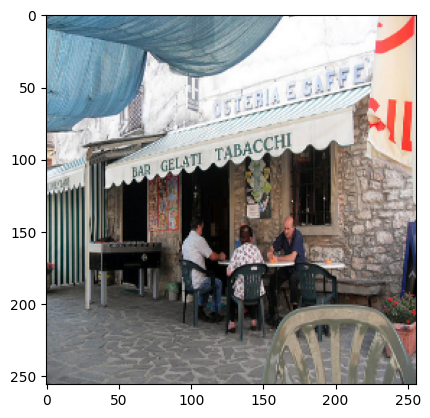

In [35]:
show_inference(image_list)

Inferece for image 3150380412.jpg :
Model I
a brown dog is splashing in the water
Model II
a dog swims in the water
Model IV
a dog swims in the water


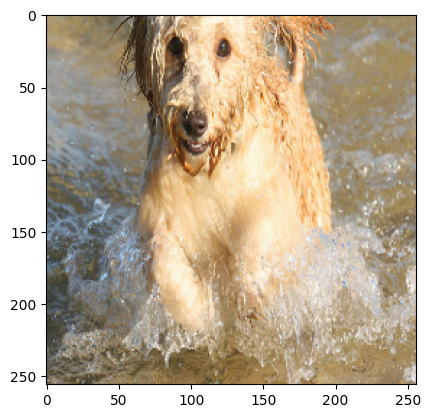

In [36]:
show_inference(image_list)

Inferece for image 2724485630.jpg :
Model I
a girl in a white shirt and blue jeans is walking down the street
Model II
a blond woman in a white shirt and jeans is walking down the street
Model IV
a woman in a white shirt is walking


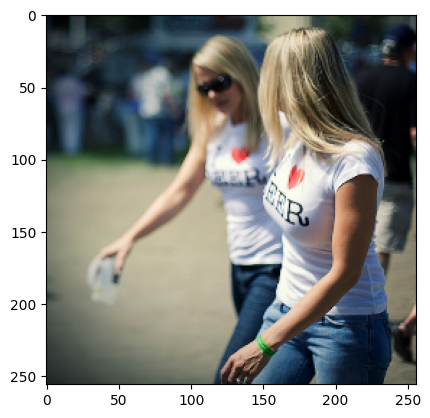

In [37]:
show_inference(image_list)

Inferece for image 110671448.jpg :
Model I
a man and a woman are sitting at a table
Model II
a group of people are sitting at a table
Model IV
a man in a blue shirt is sitting at a table


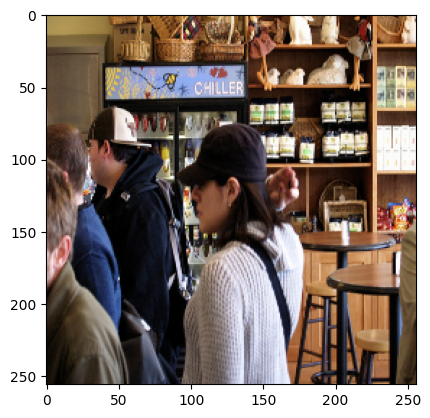

In [38]:
show_inference(image_list)

Inferece for image 1253095131.jpg :
Model I
a group of people are walking down the street
Model II
a group of people are sitting on a bench
Model IV
a group of people are sitting on a bench


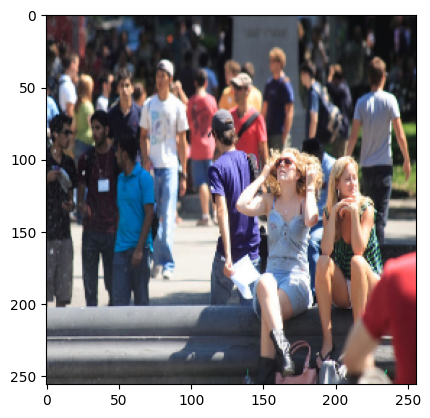

In [39]:
show_inference(image_list)

Inferece for image 4932279873.jpg :
Model I
a man is standing in front of a store
Model II
a man in a white shirt is standing in front of a store
Model IV
a woman in a white shirt is standing in front of a store


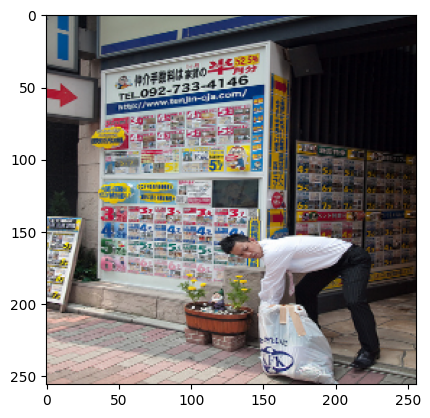

In [40]:
show_inference(image_list)

Inferece for image 1104087374.jpg :
Model I
a man and a woman are playing in the sand
Model II
a man and a woman are playing in the sand
Model IV
a woman in a blue shirt is playing in the sand


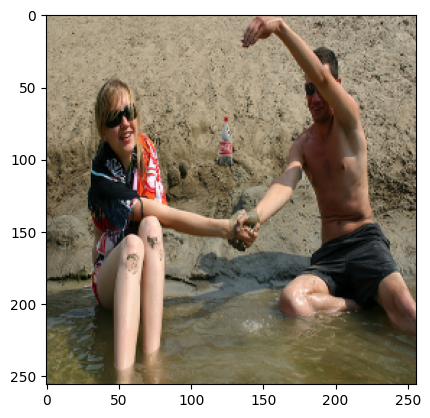

In [41]:
show_inference(image_list)